### 목표
- 붓꽃의 꽆잎의 길이/너비, 꽃받침의 길이/너비 활용하여 3가지 붓꽃 품종을 예측해보자
- knn모델의 이웃의 수를 조정해보자(하이퍼 파라미터 튜닝)

In [1]:
from sklearn.datasets import load_iris # 붓꽃 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # knn분류 모델
from sklearn.metrics import accuracy_score # 정확도 측정 도구
from sklearn.model_selection import train_test_split # 7:3 분리하는 도구

In [4]:
# 데이터 확인하기
iris_data = load_iris()
iris_data

# 딕셔너리 => ml 번치객체
# data 문제데이터 == X == 특성 == feature == 독립변수
# target 답데이터 == y == 레이블 == 타켓 == target
# feature_names 특성명
# target_names 타겟 이름(문자)
# DESCR : Describe 데이터 설명

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# 키값만 확인
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
# 문제 데이터 확인하기 2가지 방법
# iris_data.data #1
# iris_data['data'] #2
print(iris_data.data.shape) # 배열 크기(행,열)
print(iris_data.data.ndim) # 차원 확인 ndim
display(iris_data.data) # 화면에 표시 , 출력

(150, 4)
2


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
# 특성 순서 및 이름 확인하기
iris_data.feature_names
# 위 데이터의 열값들 
# 'sepal length (cm)', 꽃받침의 길이
#  'sepal width (cm)', 꽃받침의 너비
#  'petal length (cm)', 꽃받침의 길이
#  'petal width (cm)' 꽃받침의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# 답데이터 확인
iris_data.target
# 데이터 순서가 정리되어 있기 때문에 섞어줄 필요가 있음
# train_test_split 도구 진행

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# 답데이터 이름(Label) 확인하기
iris_data.target_names
# 키값에서 확인할 수 있음 
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
# DESCR 데이터 설명
print(iris_data.DESCR)
# Class Correlation : 답과 연관성

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 데이터 정리
- 1. 데이터 프레임화
- 2. 문제, 답 분리
- 3. 훈련셋, 테스트셋 분리

In [26]:
# 1. 데이터 프레임 생성

iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names )
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
# 2. 문제, 답 분리
X = iris_df
y = iris_data.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [91]:
# 3. 훈련셋, 테스트셋 분리
# train_test_split 1. 랜덤하게 섞어줌 2. 비율에 맞춰서 분리(7:3)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.3, # 30%
                                                 random_state=65)

X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
132,6.4,2.8,5.6,2.2
129,7.2,3.0,5.8,1.6
83,6.0,2.7,5.1,1.6


In [52]:
print('훈련용 문제 : ', X_train.shape)
print('훈련용 답 : ', y_train.shape)
print('테스트 문제 : ', X_test.shape)
print('테스트 답 : ', y_test.shape)

훈련용 문제 :  (105, 4)
훈련용 답 :  (105,)
테스트 문제 :  (45, 4)
테스트 답 :  (45,)


In [54]:
# 레이블의 (타겟의) 균형 확인
# 0,1,2 각각 몇개 씩 들어있는지 
# 훈련용 데이터를 기준으로 데이터 탐색
import numpy as np
np.bincount(y_train) # 7.5 : 2.5 했을 경우 데이터의 균형이 맞다 -> train 더 잘 될 수 있음

array([34, 36, 35], dtype=int64)

#### EDA : 탐색적 데이터 분석
- 산점도 행렬(scatter matrix) : 한꺼번에 변수 간의 관계를 일목요연하게 확인 가능

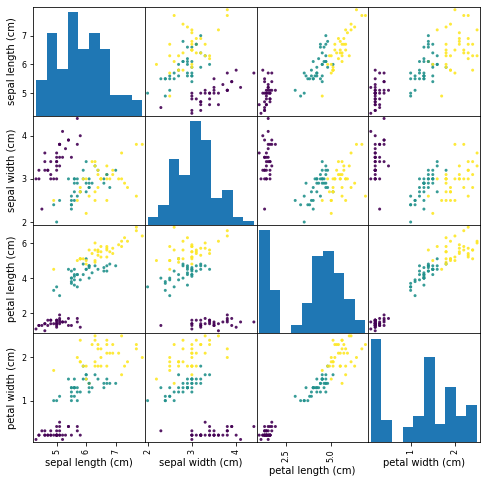

In [57]:
pd.plotting.scatter_matrix(X_train, # 데이터 포인트 설정
                           figsize=(8,8), # 그래프 크기 설정
                           c = y_train,  # 품종별 색 설정
                           alpha = 0.9) # 투명도 설정
plt.show()

#### 모델링
- 1. 모델 객체 생성 및 하이퍼 파라미터 조정
- 2. 모델 학습
- 3. 모델 품종 예측
- 4. 모델 성능 평가 : 정확도 

In [85]:
# 모델 knn
# 이웃의 수 5 , shift+tab 누르면 정보 나옴
# 이웃의 수 튜닝 3
knn_model = KNeighborsClassifier(n_neighbors=3)

In [86]:
# 학습 : X_train, y_train 을 fit() 메서드 사용
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
# 예측
pre = knn_model.predict(X_test)
# 예상되는 품종은 ?
print('-예상되는 품종은 ? ', iris_data.target_names[pre])

-예상되는 품종은 ?  ['virginica' 'virginica' 'setosa' 'versicolor' 'setosa' 'virginica'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'setosa']


In [88]:
# 예측 잘 됐는지
# 모델의 성능 평가 확인
accuracy_score(y_test,pre) # 91% # 튜닝 이후 93%

0.9333333333333333

#### 하이퍼 파라미터 조정

In [89]:
# K값을 계속 변경하면서
# 훈련데이터 정확도 확인
# 테스트데이터 정확도 확인

train_score_lst = []
test_score_lst = [] # append(정확도)

for k in range(1,50):
    # 모델 생성 및 학습
    k_model = KNeighborsClassifier(n_neighbors=k)
    k_model.fit(X_train, y_train)
    
    # 훈련데이터 정확도 저장
    train_sc = k_model.score(X_train, y_train) # 정확도 출력
    train_score_lst.append(train_sc) # 저장
    
    # 테스트 데이터 정확도 저장
    test_sc = k_model.score(X_test, y_test) # 정확도 출력
    test_score_lst.append(test_sc)

In [80]:
test_score_lst

[0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.8888888888888888,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.8888888888888888,
 0.8666666666666667,
 0.8888888888888888,
 0.8666666666666667,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666

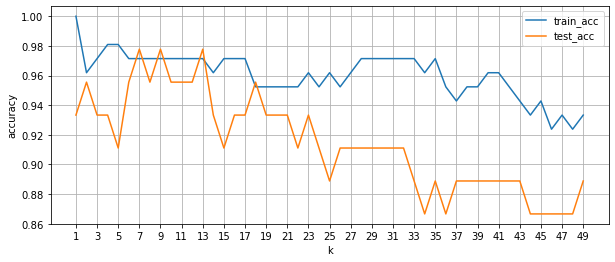

In [84]:
# 하이퍼 파라미터 변동에 따른 복잡도 곡선
plt.figure(figsize=(10,4))
plt.plot(range(1,50), train_score_lst, label='train_acc') # 선 그래프
plt.plot(range(1,50), test_score_lst, label='test_acc') # 테스트 선 그래프
plt.grid() # 눈금자
plt.xticks(range(1,50,2)) # x의 눈금축 설정
plt.xlabel('k') # x축 이름
plt.ylabel('accuracy') # y축 이름
plt.legend() # 범례 출력
plt.show()

# test가 딱 한 번 적용됨 -> k = 3
# k = 5 -> k = 3

# 추후 test를 여러번 적용 => 교차해서 검증 => 일반화 정도 교차 검증